<a href="https://colab.research.google.com/github/sheom5133/voicebot/blob/main/alpha2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set environment variables before running any other code.
import os
os.environ['TF_FORCE_UNIFIED_MEMORY'] = '1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '4.0'

In [3]:
from IPython.utils import io
import os
import subprocess
import tqdm.notebook

In [4]:
TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      # Uninstall default Colab version of TF.
      %shell pip uninstall -y tensorflow keras

      %shell sudo apt install --quiet --yes hmmer
      pbar.update(6)

      # Install py3dmol.
      %shell pip install py3dmol
      pbar.update(2)

      # Install OpenMM and pdbfixer.
      %shell rm -rf /opt/conda
      %shell wget -q -P /tmp \
        https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
          && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
          && rm /tmp/Miniconda3-latest-Linux-x86_64.sh
      pbar.update(9)

      PATH=%env PATH
      %env PATH=/opt/conda/bin:{PATH}
      %shell conda install -qy conda==24.1.2 \
          && conda install -qy -c conda-forge \
            python=3.10 \
            openmm=8.0.0 \
            pdbfixer
      pbar.update(80)

      # Create a ramdisk to store a database chunk to make Jackhmmer run fast.
      %shell sudo mkdir -m 777 --parents /tmp/ramdisk
      %shell sudo mount -t tmpfs -o size=9G ramdisk /tmp/ramdisk
      pbar.update(2)

      %shell wget -q -P /content \
        https://git.scicore.unibas.ch/schwede/openstructure/-/raw/7102c63615b64735c4941278d92b554ec94415f8/modules/mol/alg/src/stereo_chemical_props.txt
      pbar.update(1)
except subprocess.CalledProcessError:
  print(captured)
  raise

executed_cells = set([1])


  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [5]:
GIT_REPO = 'https://github.com/deepmind/alphafold'
SOURCE_URL = 'https://storage.googleapis.com/alphafold/alphafold_params_colab_2022-12-06.tar'
PARAMS_DIR = './alphafold/data/params'
PARAMS_PATH = os.path.join(PARAMS_DIR, os.path.basename(SOURCE_URL))

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      %shell rm -rf alphafold
      %shell git clone --branch main {GIT_REPO} alphafold
      pbar.update(8)
      # Install the required versions of all dependencies.
      %shell pip3 install -r ./alphafold/requirements.txt
      # Run setup.py to install only AlphaFold.
      %shell pip3 install --no-dependencies ./alphafold
      %shell pip3 install pyopenssl==22.0.0
      pbar.update(10)

      # Make sure stereo_chemical_props.txt is in all locations where it could be searched for.
      %shell mkdir -p /content/alphafold/alphafold/common
      %shell cp -f /content/stereo_chemical_props.txt /content/alphafold/alphafold/common
      %shell mkdir -p /opt/conda/lib/python3.10/site-packages/alphafold/common/
      %shell cp -f /content/stereo_chemical_props.txt /opt/conda/lib/python3.10/site-packages/alphafold/common/

      # Load parameters
      %shell mkdir --parents "{PARAMS_DIR}"
      %shell wget -O "{PARAMS_PATH}" "{SOURCE_URL}"
      pbar.update(27)

      %shell tar --extract --verbose --file="{PARAMS_PATH}" \
        --directory="{PARAMS_DIR}" --preserve-permissions
      %shell rm "{PARAMS_PATH}"
      pbar.update(55)
except subprocess.CalledProcessError:
  print(captured)
  raise

import jax
if jax.local_devices()[0].platform == 'tpu':
  raise RuntimeError('Colab TPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
elif jax.local_devices()[0].platform == 'cpu':
  raise RuntimeError('Colab CPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
else:
  print(f'Running with {jax.local_devices()[0].device_kind} GPU')

# Make sure everything we need is on the path.
import sys
sys.path.append('/opt/conda/lib/python3.10/site-packages')
sys.path.append('/content/alphafold')

executed_cells.add(2)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

Running with Tesla T4 GPU


In [8]:
#@title 3. Enter the amino acid sequence(s) to fold
#@markdown Enter the amino acid sequence(s) to fold:
#@markdown * If you enter only a single sequence, the monomer model will be
#@markdown used (unless you override this below).
#@markdown * If you enter multiple sequences, the multimer model will be used.

from alphafold.notebooks import notebook_utils
# Track cell execution to ensure correct order.
notebook_utils.check_cell_execution_order(executed_cells, 3)

import enum

@enum.unique
class ModelType(enum.Enum):
  MONOMER = 0
  MULTIMER = 1

sequence_1 = 'MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH'  #@param {type:"string"}
sequence_2 = ''  #@param {type:"string"}
sequence_3 = ''  #@param {type:"string"}
sequence_4 = ''  #@param {type:"string"}
sequence_5 = ''  #@param {type:"string"}
sequence_6 = ''  #@param {type:"string"}
sequence_7 = ''  #@param {type:"string"}
sequence_8 = ''  #@param {type:"string"}
sequence_9 = ''  #@param {type:"string"}
sequence_10 = ''  #@param {type:"string"}
sequence_11 = ''  #@param {type:"string"}
sequence_12 = ''  #@param {type:"string"}
sequence_13 = ''  #@param {type:"string"}
sequence_14 = ''  #@param {type:"string"}
sequence_15 = ''  #@param {type:"string"}
sequence_16 = ''  #@param {type:"string"}
sequence_17 = ''  #@param {type:"string"}
sequence_18 = ''  #@param {type:"string"}
sequence_19 = ''  #@param {type:"string"}
sequence_20 = ''  #@param {type:"string"}

input_sequences = (
    sequence_1, sequence_2, sequence_3, sequence_4, sequence_5,
    sequence_6, sequence_7, sequence_8, sequence_9, sequence_10,
    sequence_11, sequence_12, sequence_13, sequence_14, sequence_15,
    sequence_16, sequence_17, sequence_18, sequence_19, sequence_20)

MIN_PER_SEQUENCE_LENGTH = 16
MAX_PER_SEQUENCE_LENGTH = 4000
MAX_MONOMER_MODEL_LENGTH = 2500
MAX_LENGTH = 4000
MAX_VALIDATED_LENGTH = 3000

#@markdown Select this checkbox to run the multimer model for a single sequence.
#@markdown For proteins that are monomeric in their native form, or for very
#@markdown large single chains you may get better accuracy and memory efficiency
#@markdown by using the multimer model.
#@markdown
#@markdown
#@markdown Due to improved memory efficiency the multimer model has a maximum
#@markdown limit of 4000 residues, while the monomer model has a limit of 2500
#@markdown residues.

use_multimer_model_for_monomers = False #@param {type:"boolean"}

# Validate the input sequences.
sequences = notebook_utils.clean_and_validate_input_sequences(
    input_sequences=input_sequences,
    min_sequence_length=MIN_PER_SEQUENCE_LENGTH,
    max_sequence_length=MAX_PER_SEQUENCE_LENGTH)

if len(sequences) == 1:
  if use_multimer_model_for_monomers:
    print('Using the multimer model for single-chain, as requested.')
    model_type_to_use = ModelType.MULTIMER
  else:
    print('Using the single-chain model.')
    model_type_to_use = ModelType.MONOMER
else:
  print(f'Using the multimer model with {len(sequences)} sequences.')
  model_type_to_use = ModelType.MULTIMER

# Check whether total length exceeds limit.
total_sequence_length = sum([len(seq) for seq in sequences])
if total_sequence_length > MAX_LENGTH:
  raise ValueError('The total sequence length is too long: '
                   f'{total_sequence_length}, while the maximum is '
                   f'{MAX_LENGTH}.')

# Check whether we exceed the monomer limit.
if model_type_to_use == ModelType.MONOMER:
  if len(sequences[0]) > MAX_MONOMER_MODEL_LENGTH:
    raise ValueError(
        f'Input sequence is too long: {len(sequences[0])} amino acids, while '
        f'the maximum for the monomer model is {MAX_MONOMER_MODEL_LENGTH}. You may '
        'be able to run this sequence with the multimer model by selecting the '
        'use_multimer_model_for_monomers checkbox above.')

if total_sequence_length > MAX_VALIDATED_LENGTH:
  print('WARNING: The accuracy of the system has not been fully validated '
        'above 3000 residues, and you may experience long running times or '
        f'run out of memory. Total sequence length is {total_sequence_length} '
        'residues.')

executed_cells.add(3)

Using the single-chain model.



Getting MSA for all sequences


  0%|          | 0/199 [elapsed: 00:00 remaining: ?]

59 unique sequences found in uniref90 for sequence 1
110 unique sequences found in smallbfd for sequence 1
66 unique sequences found in mgnify for sequence 1

230 unique sequences found in total for sequence 1



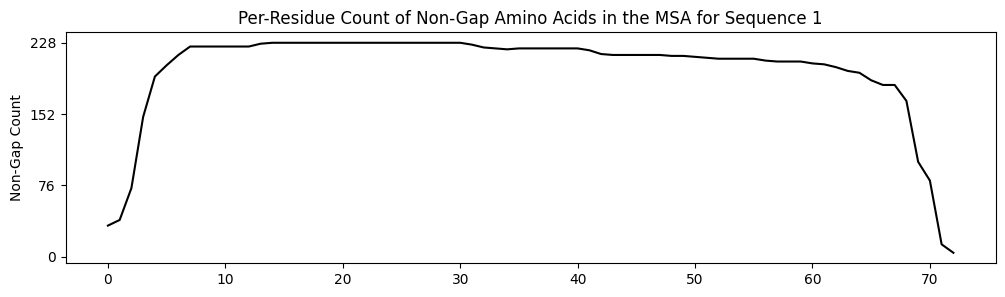

  0%|          | 0/7 [elapsed: 00:00 remaining: ?]

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

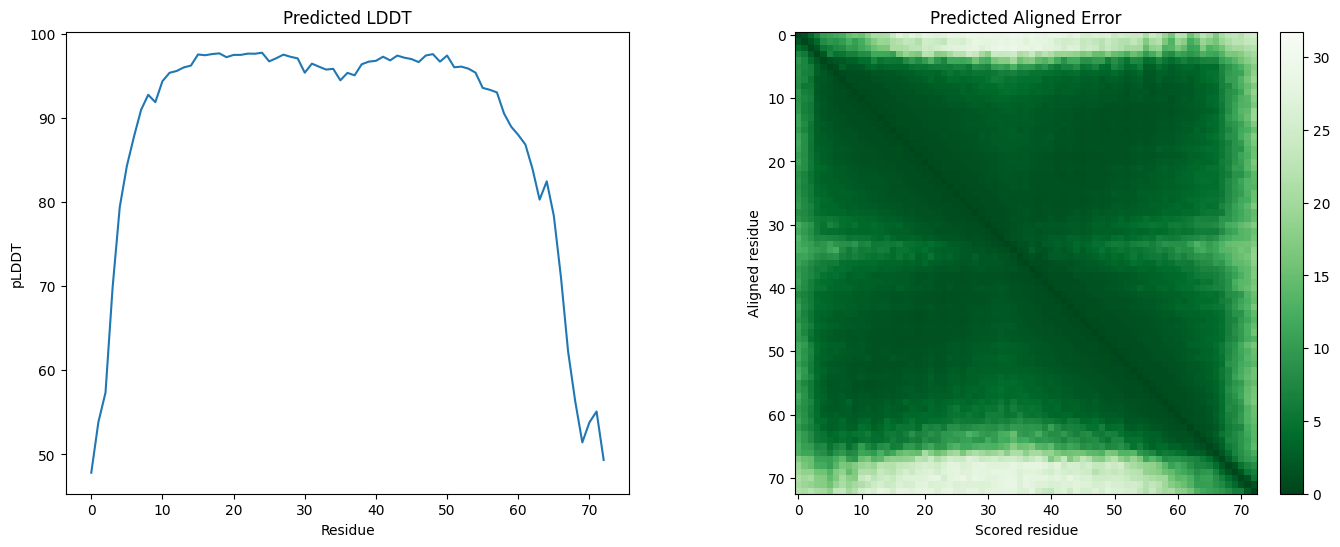

In [9]:
#@title 4. Search against genetic databases

#@markdown Once this cell has been executed, you will see
#@markdown statistics about the multiple sequence alignment
#@markdown (MSA) that will be used by AlphaFold. In particular,
#@markdown you’ll see how well each residue is covered by similar
#@markdown sequences in the MSA.

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 4)

# --- Python imports ---
import collections
import copy
from concurrent import futures
import json
import random
import shutil

from urllib import request
from google.colab import files
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol

from alphafold.model import model
from alphafold.model import config
from alphafold.model import data

from alphafold.data import feature_processing
from alphafold.data import msa_pairing
from alphafold.data import pipeline
from alphafold.data import pipeline_multimer
from alphafold.data.tools import jackhmmer

from alphafold.common import confidence
from alphafold.common import protein

from alphafold.relax import relax
from alphafold.relax import utils

from IPython import display
from ipywidgets import GridspecLayout
from ipywidgets import Output

# Color bands for visualizing plddt
PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

# --- Find the closest source ---
test_url_pattern = 'https://storage.googleapis.com/alphafold-colab{:s}/latest/uniref90_2022_01.fasta.1'
ex = futures.ThreadPoolExecutor(3)
def fetch(source):
  request.urlretrieve(test_url_pattern.format(source))
  return source
fs = [ex.submit(fetch, source) for source in ['', '-europe', '-asia']]
source = None
for f in futures.as_completed(fs):
  source = f.result()
  ex.shutdown()
  break

JACKHMMER_BINARY_PATH = '/usr/bin/jackhmmer'
DB_ROOT_PATH = f'https://storage.googleapis.com/alphafold-colab{source}/latest/'
# The z_value is the number of sequences in a database.
MSA_DATABASES = [
    {'db_name': 'uniref90',
     'db_path': f'{DB_ROOT_PATH}uniref90_2022_01.fasta',
     'num_streamed_chunks': 62,
     'z_value': 144_113_457},
    {'db_name': 'smallbfd',
     'db_path': f'{DB_ROOT_PATH}bfd-first_non_consensus_sequences.fasta',
     'num_streamed_chunks': 17,
     'z_value': 65_984_053},
    {'db_name': 'mgnify',
     'db_path': f'{DB_ROOT_PATH}mgy_clusters_2022_05.fasta',
     'num_streamed_chunks': 120,
     'z_value': 623_796_864},
]

# Search UniProt and construct the all_seq features only for heteromers, not homomers.
if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
  MSA_DATABASES.extend([
      # Swiss-Prot and TrEMBL are concatenated together as UniProt.
      {'db_name': 'uniprot',
       'db_path': f'{DB_ROOT_PATH}uniprot_2021_04.fasta',
       'num_streamed_chunks': 101,
       'z_value': 225_013_025 + 565_928},
  ])

TOTAL_JACKHMMER_CHUNKS = sum([cfg['num_streamed_chunks'] for cfg in MSA_DATABASES])

MAX_HITS = {
    'uniref90': 10_000,
    'smallbfd': 5_000,
    'mgnify': 501,
    'uniprot': 50_000,
}


def get_msa(sequences):
  """Searches for MSA for given sequences using chunked Jackhmmer search.

  Args:
    sequences: A list of sequences to search against all databases.

  Returns:
    A dictionary mapping unique sequences to dicionaries mapping each database
    to a list of  results, one for each chunk of the database.
  """
  sequence_to_fasta_path = {}
  # Deduplicate to not do redundant work for multiple copies of the same chain in homomers.
  for sequence_index, sequence in enumerate(sorted(set(sequences)), 1):
    fasta_path = f'target_{sequence_index:02d}.fasta'
    with open(fasta_path, 'wt') as f:
      f.write(f'>query\n{sequence}')
    sequence_to_fasta_path[sequence] = fasta_path

  # Run the search against chunks of genetic databases (since the genetic
  # databases don't fit in Colab disk).
  raw_msa_results = {sequence: {} for sequence in sequence_to_fasta_path.keys()}
  print('\nGetting MSA for all sequences')
  with tqdm.notebook.tqdm(total=TOTAL_JACKHMMER_CHUNKS, bar_format=TQDM_BAR_FORMAT) as pbar:
    def jackhmmer_chunk_callback(i):
      pbar.update(n=1)

    for db_config in MSA_DATABASES:
      db_name = db_config['db_name']
      pbar.set_description(f'Searching {db_name}')
      jackhmmer_runner = jackhmmer.Jackhmmer(
          binary_path=JACKHMMER_BINARY_PATH,
          database_path=db_config['db_path'],
          get_tblout=True,
          num_streamed_chunks=db_config['num_streamed_chunks'],
          streaming_callback=jackhmmer_chunk_callback,
          z_value=db_config['z_value'])
      # Query all unique sequences against each chunk of the database to prevent
      # redunantly fetching each chunk for each unique sequence.
      results = jackhmmer_runner.query_multiple(list(sequence_to_fasta_path.values()))
      for sequence, result_for_sequence in zip(sequence_to_fasta_path.keys(), results):
        raw_msa_results[sequence][db_name] = result_for_sequence

  return raw_msa_results


features_for_chain = {}
raw_msa_results_for_sequence = get_msa(sequences)
for sequence_index, sequence in enumerate(sequences, start=1):
  raw_msa_results = copy.deepcopy(raw_msa_results_for_sequence[sequence])

  # Extract the MSAs from the Stockholm files.
  # NB: deduplication happens later in pipeline.make_msa_features.
  single_chain_msas = []
  uniprot_msa = None
  for db_name, db_results in raw_msa_results.items():
    merged_msa = notebook_utils.merge_chunked_msa(
        results=db_results, max_hits=MAX_HITS.get(db_name))
    if merged_msa.sequences and db_name != 'uniprot':
      single_chain_msas.append(merged_msa)
      msa_size = len(set(merged_msa.sequences))
      print(f'{msa_size} unique sequences found in {db_name} for sequence {sequence_index}')
    elif merged_msa.sequences and db_name == 'uniprot':
      uniprot_msa = merged_msa

  notebook_utils.show_msa_info(single_chain_msas=single_chain_msas, sequence_index=sequence_index)

  # Turn the raw data into model features.
  feature_dict = {}
  feature_dict.update(pipeline.make_sequence_features(
      sequence=sequence, description='query', num_res=len(sequence)))
  feature_dict.update(pipeline.make_msa_features(msas=single_chain_msas))
  # We don't use templates in AlphaFold Colab notebook, add only empty placeholder features.
  feature_dict.update(notebook_utils.empty_placeholder_template_features(
      num_templates=0, num_res=len(sequence)))

  # Construct the all_seq features only for heteromers, not homomers.
  if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
    valid_feats = msa_pairing.MSA_FEATURES + (
        'msa_species_identifiers',
    )
    all_seq_features = {
        f'{k}_all_seq': v for k, v in pipeline.make_msa_features([uniprot_msa]).items()
        if k in valid_feats}
    feature_dict.update(all_seq_features)

  features_for_chain[protein.PDB_CHAIN_IDS[sequence_index - 1]] = feature_dict


# Do further feature post-processing depending on the model type.
if model_type_to_use == ModelType.MONOMER:
  np_example = features_for_chain[protein.PDB_CHAIN_IDS[0]]

elif model_type_to_use == ModelType.MULTIMER:
  all_chain_features = {}
  for chain_id, chain_features in features_for_chain.items():
    all_chain_features[chain_id] = pipeline_multimer.convert_monomer_features(
        chain_features, chain_id)

  all_chain_features = pipeline_multimer.add_assembly_features(all_chain_features)

  np_example = feature_processing.pair_and_merge(
      all_chain_features=all_chain_features)

  # Pad MSA to avoid zero-sized extra_msa.
  np_example = pipeline_multimer.pad_msa(np_example, min_num_seq=512)

executed_cells.add(4)


#@title 5. Run AlphaFold and download prediction

#@markdown Once this cell has been executed, a zip-archive with
#@markdown the obtained prediction will be automatically downloaded
#@markdown to your computer.

#@markdown In case you are having issues with the relaxation stage, you can disable it below.
#@markdown Warning: This means that the prediction might have distracting
#@markdown small stereochemical violations.

run_relax = True  #@param {type:"boolean"}

#@markdown Relaxation is faster with a GPU, but we have found it to be less stable.
#@markdown You may wish to enable GPU for higher performance, but if it doesn't
#@markdown converge we suggested reverting to using without GPU.

relax_use_gpu = False  #@param {type:"boolean"}


#@markdown The multimer model will continue recycling until the predictions stop
#@markdown changing, up to the limit set here. For higher accuracy, at the
#@markdown potential cost of longer inference times, set this to 20.

multimer_model_max_num_recycles = 3  #@param {type:"integer"}

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 5)

# --- Run the model ---
if model_type_to_use == ModelType.MONOMER:
  model_names = config.MODEL_PRESETS['monomer'] + ('model_2_ptm',)
elif model_type_to_use == ModelType.MULTIMER:
  model_names = config.MODEL_PRESETS['multimer']

output_dir = 'prediction'
os.makedirs(output_dir, exist_ok=True)

plddts = {}
ranking_confidences = {}
pae_outputs = {}
unrelaxed_proteins = {}

with tqdm.notebook.tqdm(total=len(model_names) + 1, bar_format=TQDM_BAR_FORMAT) as pbar:
  for model_name in model_names:
    pbar.set_description(f'Running {model_name}')

    cfg = config.model_config(model_name)

    if model_type_to_use == ModelType.MONOMER:
      cfg.data.eval.num_ensemble = 1
    elif model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_ensemble_eval = 1

    if model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_recycle = multimer_model_max_num_recycles
      cfg.model.recycle_early_stop_tolerance = 0.5

    params = data.get_model_haiku_params(model_name, './alphafold/data')
    model_runner = model.RunModel(cfg, params)
    processed_feature_dict = model_runner.process_features(np_example, random_seed=0)
    prediction = model_runner.predict(processed_feature_dict, random_seed=random.randrange(sys.maxsize))

    mean_plddt = prediction['plddt'].mean()

    if model_type_to_use == ModelType.MONOMER:
      if 'predicted_aligned_error' in prediction:
        pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                   prediction['max_predicted_aligned_error'])
      else:
        # Monomer models are sorted by mean pLDDT. Do not put monomer pTM models here as they
        # should never get selected.
        ranking_confidences[model_name] = prediction['ranking_confidence']
        plddts[model_name] = prediction['plddt']
    elif model_type_to_use == ModelType.MULTIMER:
      # Multimer models are sorted by pTM+ipTM.
      ranking_confidences[model_name] = prediction['ranking_confidence']
      plddts[model_name] = prediction['plddt']
      pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                 prediction['max_predicted_aligned_error'])

    # Set the b-factors to the per-residue plddt.
    final_atom_mask = prediction['structure_module']['final_atom_mask']
    b_factors = prediction['plddt'][:, None] * final_atom_mask
    unrelaxed_protein = protein.from_prediction(
        processed_feature_dict,
        prediction,
        b_factors=b_factors,
        remove_leading_feature_dimension=(
            model_type_to_use == ModelType.MONOMER))
    unrelaxed_proteins[model_name] = unrelaxed_protein

    # Delete unused outputs to save memory.
    del model_runner
    del params
    del prediction
    pbar.update(n=1)

  # --- AMBER relax the best model ---

  # Find the best model according to the mean pLDDT.
  best_model_name = max(ranking_confidences.keys(), key=lambda x: ranking_confidences[x])

  if run_relax:
    pbar.set_description(f'AMBER relaxation')
    amber_relaxer = relax.AmberRelaxation(
        max_iterations=0,
        tolerance=2.39,
        stiffness=10.0,
        exclude_residues=[],
        max_outer_iterations=3,
        use_gpu=relax_use_gpu)
    relaxed_pdb, _, _ = amber_relaxer.process(prot=unrelaxed_proteins[best_model_name])
  else:
    print('Warning: Running without the relaxation stage.')
    relaxed_pdb = protein.to_pdb(unrelaxed_proteins[best_model_name])
  pbar.update(n=1)  # Finished AMBER relax.

# Construct multiclass b-factors to indicate confidence bands
# 0=very low, 1=low, 2=confident, 3=very high
banded_b_factors = []
for plddt in plddts[best_model_name]:
  for idx, (min_val, max_val, _) in enumerate(PLDDT_BANDS):
    if plddt >= min_val and plddt <= max_val:
      banded_b_factors.append(idx)
      break
banded_b_factors = np.array(banded_b_factors)[:, None] * final_atom_mask
to_visualize_pdb = utils.overwrite_b_factors(relaxed_pdb, banded_b_factors)


# Write out the prediction
pred_output_path = os.path.join(output_dir, 'selected_prediction.pdb')
with open(pred_output_path, 'w') as f:
  f.write(relaxed_pdb)


# --- Visualise the prediction & confidence ---
show_sidechains = True
def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

# Show the structure coloured by chain if the multimer model has been used.
if model_type_to_use == ModelType.MULTIMER:
  multichain_view = py3Dmol.view(width=800, height=600)
  multichain_view.addModelsAsFrames(to_visualize_pdb)
  multichain_style = {'cartoon': {'colorscheme': 'chain'}}
  multichain_view.setStyle({'model': -1}, multichain_style)
  multichain_view.zoomTo()
  multichain_view.show()

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

# Display pLDDT and predicted aligned error (if output by the model).
if pae_outputs:
  num_plots = 2
else:
  num_plots = 1

plt.figure(figsize=[8 * num_plots, 6])
plt.subplot(1, num_plots, 1)
plt.plot(plddts[best_model_name])
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')

if num_plots == 2:
  plt.subplot(1, 2, 2)
  pae, max_pae = list(pae_outputs.values())[0]
  plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
  plt.colorbar(fraction=0.046, pad=0.04)

  # Display lines at chain boundaries.
  best_unrelaxed_prot = unrelaxed_proteins[best_model_name]
  total_num_res = best_unrelaxed_prot.residue_index.shape[-1]
  chain_ids = best_unrelaxed_prot.chain_index
  for chain_boundary in np.nonzero(chain_ids[:-1] - chain_ids[1:]):
    if chain_boundary.size:
      plt.plot([0, total_num_res], [chain_boundary, chain_boundary], color='red')
      plt.plot([chain_boundary, chain_boundary], [0, total_num_res], color='red')

  plt.title('Predicted Aligned Error')
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

# Save the predicted aligned error (if it exists).
pae_output_path = os.path.join(output_dir, 'predicted_aligned_error.json')
if pae_outputs:
  # Save predicted aligned error in the same format as the AF EMBL DB.
  pae_data = confidence.pae_json(pae=pae, max_pae=max_pae.item())
  with open(pae_output_path, 'w') as f:
    f.write(pae_data)

# --- Download the predictions ---
shutil.make_archive(base_name='prediction', format='zip', root_dir=output_dir)
files.download(f'{output_dir}.zip')



In [10]:
executed_cells.add(5)